# Project: Investigate a Dataset - Medical Appointment No Shows

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> ***A person makes a doctor appointment, receives all the instructions and no-show. Who to blame?*** 

#### Content:
   **110.527** medical appointments its **14** associated variables (characteristics).
*Independent Variable*
* **PatientId**: Identification of a patient
* **AppointmentID**: Identification of each appointment
* **Gender**: Male or Female 
* **ScheduledDay**: The day of the actuall appointment
* **AppointmentDay**: The day someone called or registered the appointment
* **Age**: Pateint's day
* **Neighbourhood**: Where the appointment takes place.
* **Scholarship**: True or False: 1 or 0
* **Hipertension**: True or False: 1 or 0
* **Diabetes**: True or False: 1 or 0
* **Alcoholism**: True or False: 1 or 0
* **Handcap**: True or False: 1 or 0
* **SMS_received**: True or False: 1 or 0

*Dependent Variable*
* **No-show**: True or False: 1 or 0


### Questions for Analysis
>**Q1**: Which certain gender show more commitment to their medical appointment that the other?

> **Q2**: Does patient's age correlate with them showing up to the appointment?

> **Q3**: Does the patient's Scholarship availability affect their decision to attend their medical appointment?

> **Q4**: Does patient's disease affect their decision to appear to the appointment? 

> **Q5**: Most requent neighborhood, and day for appointments and scheduling?

> **Q6**: Duration between scheduling and appointment days, in terms of: minimum, maximum, etc..?

In [5]:
# packages needed during the analysis

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [9]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling



In [6]:
# load dataset
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [7]:
# lookup the first few records
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [220]:
# lookup the data shape
df.shape

(110527, 14)

In [221]:
# lookup datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [222]:
# check for NULL values
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [223]:
# check for duplicates
df.duplicated().sum()

0

In [224]:
# descriptive statistics about the data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


#### Insights:
- According to the descriptive statistics table, it is detectable that the majority of patients age is between 18-37, and also disease such as: Hipertension, Diabetes, and alcholism, seem to be presented with small percentage in the data (We will check for this as we proceed)


### Data Cleaning
**Issues**
> * Issue 1: Some column names needs handling 
> * Issue 2: Data types of some attribute
    * Patient_ID is float -> convert to string
    * Appointment_ID is int -> convert to string
    * ScheduledDay and AppointmentDay are strings
> * Issue 3: Age attribute has negative values

In [8]:
# Issue 1: rename some columns
df.rename(columns={'PatientId':'Patient_ID', 'AppointmentID':'Appointment_ID', 'Hipertension':'Hypertension', 'Handcap':'Handicap', 'No-show':'No_Show'}, inplace=True)

In [226]:
df.head(2)

,Patient_ID,Appointment_ID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [9]:
# Issue 1: Patientid has to be converted from float to string
df['Patient_ID'] = df['Patient_ID'].astype(str)

In [10]:
# Issue 1: Patientid has to be converted from float to string
df['Appointment_ID'] = df['Appointment_ID'].astype(str)

In [42]:
# Issue 1: both ScheduledDay and AppointmentDay has to be converted from strings to datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

In [43]:
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [13]:
# check changes went right
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   Patient_ID      110527 non-null  object             
 1   Appointment_ID  110527 non-null  object             
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hypertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handicap        110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No_Show       

In [14]:
#Issue 3: remove records with age < 0
rec_index = df[df['Age'] < 0].index[0]
rec_index

99832

In [15]:
df.drop([rec_index], inplace=True)

In [16]:
# check changes went right
df[df['Age'] < 0]

,Patient_ID,Appointment_ID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show


<a id='eda'></a>
## Exploratory Data Analysis

> - There are 13 Independent Variables -> ['Patient_ID' 'Appointment_ID' 'Gender' 'ScheduledDay' 'AppointmentDay' 'Age' 'Neighbourhood' 'Scholarship' 'Hypertension' 'Diabetes' 'Alcoholism' 'SMS_received']
> - The Dependent Variable is -> ['No_Show']

### - Distribution of Dependent Variable (No_Show)

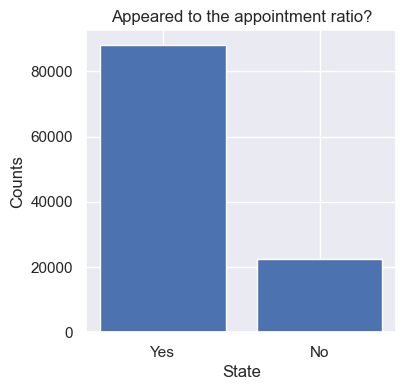

In [238]:
# plot no-show variable distribution
df_Y = df['No_Show'].value_counts()[0]
df_N = df['No_Show'].value_counts()[1]

fig, ax = plt.subplots(figsize=(4, 4), dpi=100)
plt.bar(["Yes", "No"], [df_Y, df_N])
plt.title("Appeared to the appointment ratio?")
plt.xlabel("State")
plt.ylabel("Counts");

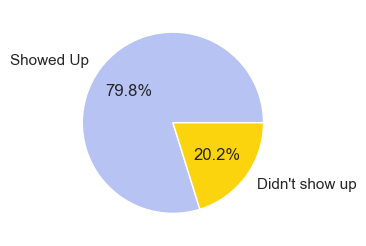

In [239]:
# Ratio between 'showing up' to 'not show up'
#'#4F6272', 
# Create a set of colors
colors = ['#B7C3F3', '#fcd40d']
values = [df_Y, df_N]
labels = ["Showed Up", "Didn't show up"]
fig, ax = plt.subplots(figsize=(3, 3), dpi=100)

plt.pie(values, labels=labels, labeldistance=1.15, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, 
        colors=colors, autopct='%1.1f%%');

### - Distribution of Gender

In [241]:
# Female and Male counts
df['Gender'].value_counts(normalize=True)

F    0.649974
M    0.350026
Name: Gender, dtype: float64

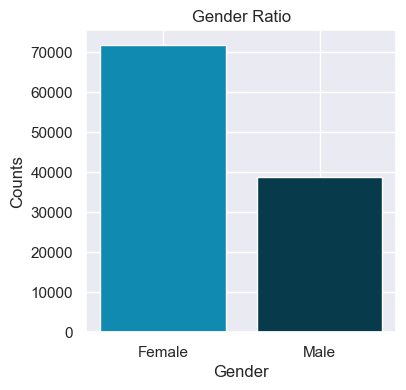

In [242]:
# plot gender distribution
df_F = df['Gender'].value_counts()[0]
df_M = df['Gender'].value_counts()[1]

colors = ['#118ab2', '#073b4c']
fig, ax = plt.subplots(figsize=(4, 4), dpi=100)

plt.bar(["Female", "Male"], [df_F, df_M], color = colors)
plt.title("Gender Ratio")
plt.xlabel("Gender")
plt.ylabel("Counts");

#### Insights:
> Accordingly to the above figure, it is detectable that Female patients represent more than 50% of the data. Hence why, we need precise measuring when it comes to patient's gender

### ***Q1***: Which certain gender show more commitment to their medical appointment that the other?

In [243]:
# cross tabulation between Gender and No-show
crosstab = pd.crosstab(index=df['Gender'], columns=df['No_Show'])
crosstab

No_Show,No,Yes
Gender,,
F,57245,14594
M,30962,7725


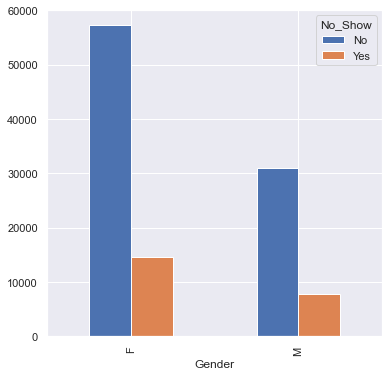

In [244]:
# plot cross tabulation
crosstab.plot(kind='bar', figsize=(6,6));

In [245]:
# percentage of female patients showing up to the appointment
pd.crosstab(index=df['Gender'], columns=df['No_Show'], normalize='index')

No_Show,No,Yes
Gender,,
F,0.796851,0.203149
M,0.800321,0.199679


#### Insights
> Both female and male patients has almost the same commitment to attend their medical appointment.

### - Distribution of Age

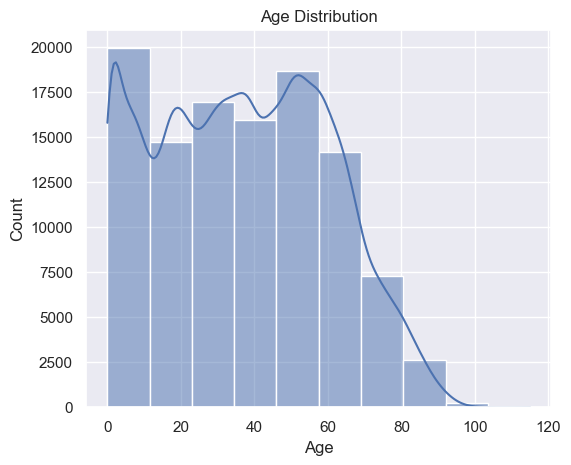

In [251]:
fig, ax = plt.subplots(figsize=(6, 5), dpi=100)
sns.histplot(data=df, x='Age', bins=10, kde=True).set(title="Age Distribution");

> * Age distribution is right skewed, meaning that most of the patients is of young age

### ***Q2***: Does patient's age correlate with them showing up to the appointment?

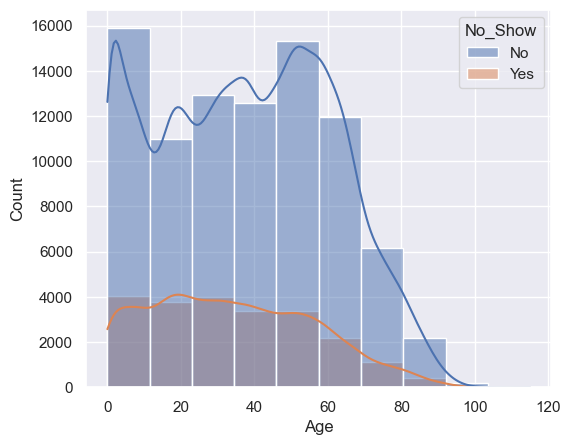

In [146]:
fig, ax = plt.subplots(figsize=(6, 5), dpi=100)
sns.histplot(data=df, x='Age', bins=10, kde=True, hue='No_Show');

### ***Q3***: Does the patient's Scholarship availability affect their decision to attend their medical appointment?

In [253]:
# count ratio of patients having scholarship to patients that do not
df_available = df[df['Scholarship'] == 1].count()['Scholarship']
df_abscent = df[df['Scholarship'] == 0].count()['Scholarship']

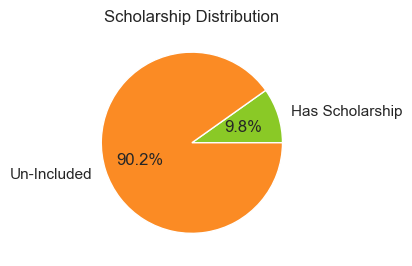

In [254]:
# Ratio between 'showing up' to 'not show up'
#'#4F6272', 
# Create a set of colors
colors = ['#8ac926', '#fb8b24']
values = [df_available, df_abscent]
labels = ["Has Scholarship", "Un-Included"]
fig, ax = plt.subplots(figsize=(3, 3), dpi=100)
plt.title("Scholarship Distribution")

plt.pie(values, labels=labels, labeldistance=1.15, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, 
        colors=colors, autopct='%1.1f%%');

* Most of the patients do not hold a scholarship with percentage of **90.2%**
* **9.8%** of the patients hold a scholarship

In [255]:
pd.crosstab(index=df['Scholarship'], columns=df['No_Show'], normalize='index')

No_Show,No,Yes
Scholarship,,
0,0.801926,0.198074
1,0.762637,0.237363


**Patients with schoalrship:**
* Around 80% of these patients attend their appointment
* 19% of them didn't show up

**Patients without schoalrship:**
* Around 76% of these patients attend their appointment
* Around 23% of them didn't show up

### *Q4*: Does patient's disease affect their decision to appear to the appointment?

**- Diabetes diseased patients**

In [186]:
df['Diabetes'].value_counts(normalize=True)

0    0.928135
1    0.071865
Name: Diabetes, dtype: float64

In [198]:
pd.crosstab(index=df['Diabetes'], columns=df['No_Show'], normalize='index')

No_Show,No,Yes
Diabetes,,
0,0.796370,0.203630
1,0.819967,0.180033


**- Hypertension diseased patients**

In [191]:
df['Hypertension'].value_counts(normalize=True)

0    0.802752
1    0.197248
Name: Hypertension, dtype: float64

In [197]:
pd.crosstab(index=df['Hypertension'], columns=df['No_Show'], normalize='index')

No_Show,No,Yes
Hypertension,,
0,0.790961,0.209039
1,0.826980,0.173020


**- Alcoholism patients**

In [196]:
df['Alcoholism'].value_counts(normalize=True)

0    0.9696
1    0.0304
Name: Alcoholism, dtype: float64

In [199]:
pd.crosstab(index=df['Alcoholism'], columns=df['No_Show'], normalize='index')

No_Show,No,Yes
Alcoholism,,
0,0.798052,0.201948
1,0.798512,0.201488


**- Handicap patients**
> 1-to-4 for different degrees

In [200]:
df['Handicap'].value_counts(normalize=True)

0    0.979724
1    0.018475
2    0.001656
3    0.000118
4    0.000027
Name: Handicap, dtype: float64

In [201]:
pd.crosstab(index=df['Handicap'], columns=df['No_Show'], normalize='index')

No_Show,No,Yes
Handicap,,
0,0.797645,0.202355
1,0.820764,0.179236
2,0.797814,0.202186
3,0.769231,0.230769
4,0.666667,0.333333


### ***Q5***: Most requent neighborhood, and day for appointments and scheduling?

> #### Most frequent neighbourhoods (Top 3)

In [256]:
df['Neighbourhood'].nunique()

81

> The data records **81** neighbourhoods

In [257]:
top = df['Neighbourhood'].value_counts().head(3)
top

JARDIM CAMBURI    7717
MARIA ORTIZ       5805
RESISTÊNCIA       4431
Name: Neighbourhood, dtype: int64

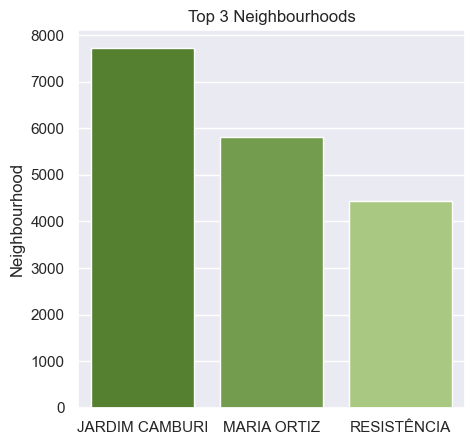

In [259]:
# bar plot for top 3 neighbourhoods

#color palette:
palette = ['#538d22', '#73a942', '#aad576']
sns.set_theme()
fig, ax = plt.subplots(figsize=(5, 5), dpi=100)

sns.barplot(x=top.index, y=top, palette=palette).set(title="Top 3 Neighbourhoods");



> #### Most frequent day for appointment and scheduling

In [19]:
# create new column to store scheduling day as week day name
df['Scheduling_DayName'] = df['ScheduledDay'].dt.day_name()

In [20]:
# create new column to store appointment day as week day name
df['Appointment_DayName'] = df['AppointmentDay'].dt.day_name()

##### Automate frequent day pie chart

In [97]:
def freqDay_piechart(value_counts, chart_title):
    '''
        Takes two parameters: value_counts of a column, chart title
        Return the pie chart for the value counts entered
    '''
    #color palette:
    palette = ['#c0d6df', '#8ecae6', '#219ebc', '#126782', '#ffb703', '#fd9e02', '#fb8500']
    
    fig, ax = plt.subplots(figsize=(5, 5), dpi=100)
    plt.title(chart_title)
    plot = plt.pie(value_counts, labels=value_counts.index, labeldistance=1.15, 
                   wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, colors=palette, 
                   autopct='%0.2f%%', radius=1);
    return(plot)

In [21]:
# counts the presence of each day
freq_schedule_days = df['Scheduling_DayName'].value_counts()
freq_schedule_days

Tuesday      26168
Wednesday    24262
Monday       23084
Friday       18915
Thursday     18073
Saturday        24
Name: Scheduling_DayName, dtype: int64

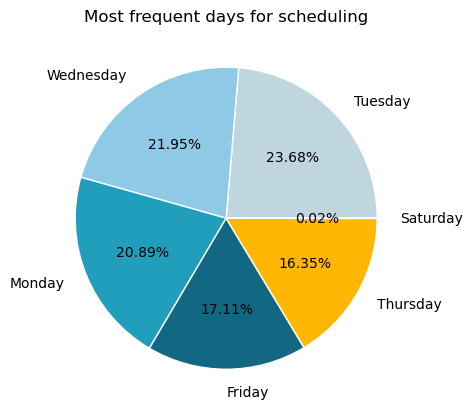

In [34]:
freq_schedule_plot = freqDay_piechart(freq_schedule_days, chart_title= "Most frequent days for scheduling")
freq_schedule_plot;

> Most frequent day for scheduling is **Tuseday**

In [30]:
# counts the presence of each day
freq_appoint_days = df['Appointment_DayName'].value_counts()
freq_appoint_days

Wednesday    25867
Tuesday      25640
Monday       22714
Friday       19019
Thursday     17247
Saturday        39
Name: Appointment_DayName, dtype: int64

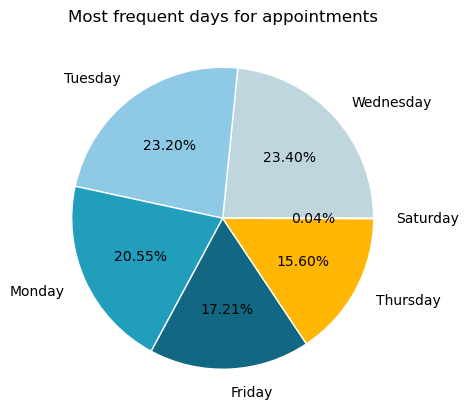

In [35]:
# pie plot for days freque
freq_appoint_plot = freqDay_piechart(freq_appoint_days, chart_title = "Most frequent days for appointments")
freq_appoint_plot;

> Most frequent for appointments is **Wednesday**

> We can also detect that **Saturday** is the least frequent day for both scheduling and appointments.

### ***Q6***: Duration between scheduling and appointment days, in terms of: minimum, maximum, etc..?

In [78]:
# first, will create new column to store duration between sheduling and appointments days
df['Duration'] = abs((df['AppointmentDay'].dt.date - df['ScheduledDay'].dt.date))

In [79]:
df['Duration'].value_counts()

0 days      38562
2 days       6725
4 days       5290
1 days       5217
7 days       4906
            ...  
132 days        1
125 days        1
117 days        1
146 days        1
123 days        1
Name: Duration, Length: 129, dtype: int64

> It seems that, most patients who call to schedule, get their appointment in the same day.

In [80]:
df['Duration'].min()

Timedelta('0 days 00:00:00')

> It means that patients might wait for a few seconds, or even get the appointment immediately.

In [81]:
df['Duration'].max()

Timedelta('179 days 00:00:00')

> **That alot!!** A patient might wait for 179 days to get their appointment! Fortunately, it present rarely in the data, which means it's not the usual situation in appointments duration.

Now lets see if patient/s who waited this long, ended up attending their medical appointment of not? and vise versa, did patients who got immediate appointment, ended up commiting to their appointment?

##### Prior, lets automate the pie chart

In [98]:
def wait_attendance_ratio(value_counts, chart_title):
    '''
        Takes two parameters: value_counts of a column, chart title
        Return the pie chart for the value counts entered
    '''
    # color palette
    palette = ['#B7C3F3', '#f77f00']
    
    fig, ax = plt.subplots(figsize=(5, 5), dpi=100)
    plt.title(chart_title)
    plot = plt.pie(value_counts, labels=value_counts.index, 
                   labeldistance=1.15, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, colors=palette, 
                   autopct='%1.0f%%', radius=0.9);
    return(plot)

In [83]:
patients_max_duration = df[df['Duration'] == df['Duration'].max()]
patients_max_duration.count()['Patient_ID']

10

In [84]:
patients_count_max = patients_max_duration['No_Show'].value_counts()

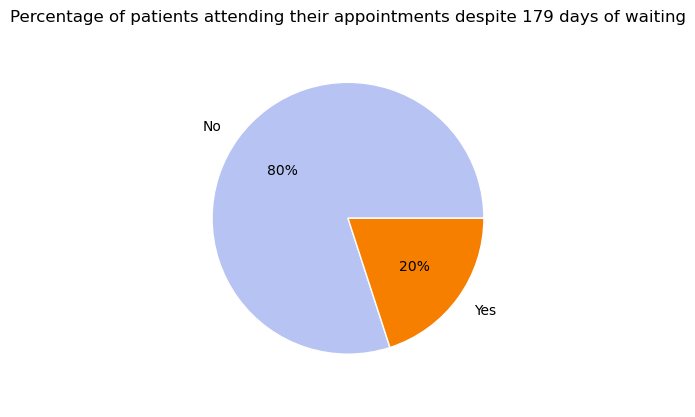

In [94]:
# plot waiting:attendance ratio as pie chart
max_pie_chart = wait_attendance_ratio(patients_count_max, 
                                      chart_title="Percentage of patients attending their appointments despite 179 days of waiting" )

* There are 10 patients who waited 179 days to attend their appointment.
* Among these patients, **80%** of them attended their medical appointment despite the long wait, and **20%** tend to not show up to the appointment.

In [ ]:
patients_min_duration = df[df['Duration'] == df['Duration'].min()]
patients_min_duration.count()['Patient_ID']

38562

In [ ]:
patients_counts_min = patients_min_duration['No_Show'].value_counts()
patients_counts_min

No     36770
Yes     1792
Name: No_Show, dtype: int64

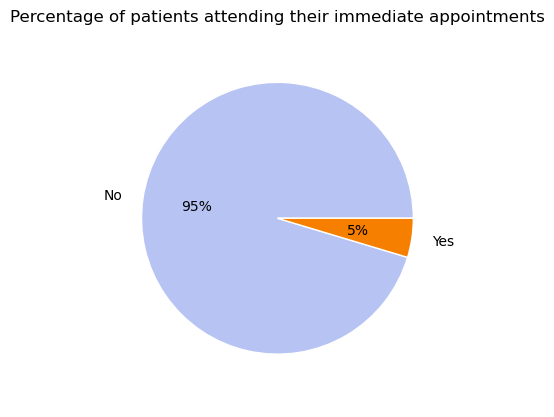

In [95]:
# plot waiting:attendance ratio as pie chart
max_pie_chart = wait_attendance_ratio(patients_counts_min, 
                                      chart_title="Percentage of patients attending their immediate appointments")

* **95.35%** of patients who got their appointments immediatly tend to attend.
* **4.65%** of patients who got their appointments immediatly tend to not attend.

In [96]:
df['Duration'].mean()

Timedelta('10 days 04:24:55.423701210')

> We can finally say that, the average waiting time for patients to get their appointments is 10 days, 4 hours, and 24 minutes.

<a id='conclusions'></a>
## Conclusions

1. 79.8% of patients showed up to their appointmens, and 20.2% didn't attend.
2. Both female and male patients has almost the same commitment to attend their medical appointment.
3. Most of the patients is of a young age
4. Most of the patients do not hold a scholarship with percentage of 90.2%. While, 9.8% of the patients hold a scholarship. Both of these sections show almost similar commitment to their appointments.
5. 7.18% of patients have diabetes: 81.9% of them showed up to their appointment, while, around 18% of them didn't attend.
6. 19.7% of patients have hypertension: 82.6% of them showed up to their appointment, while, 17.3% of them didn't attend.
7. 3% of patients are alcoholism: 79.8% of them showed up to their appointment; while, 0.2% of them didn't attend.
8. Top 3 neighbourhoods frequently presented.
9. Most frequent day for scheduling is Tuseday.
10. Most frequent for appointments is Wednesday.
11. Most patients patients might wait for a few seconds, or even get the appointment immediately.
12. A patient might wait for 179 days to get their appointment! Fortunately, it present rarely in the data, which means it's not the usual situation in appointments duration. Despite that, 80% of them show up to their appointments.
13. The average waiting time for patients to get their appointments is 10 days, 4 hours, and 24 minutes.


#### Limitaions:

* A feedback feature would make a significance impact to investigate whether patients had a negative feedback, and thus, they didn't show up!
* The dataset has a lot of categorical features, which limited some plots -> meaningless


In [156]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1